In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-subscribers-data-2024/youtube_subscribers_data.csv


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# 1-Exploratory Data Analysis (EDA)

### Import Libraries 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Load the Dataset

In [4]:
df = pd.read_csv('/kaggle/input/youtube-subscribers-data-2024/youtube_subscribers_data.csv')

### Show first 5 rows

In [5]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,335.0,English,Entertainment,United States
1,T-Series,Yes,280.0,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,186.0,English,Education,United States
3,SET India,Yes,180.0,Hindi,Entertainment,India
4,Vlad and Niki,No,129.0,English,Entertainment,Russia


### Check the total rows and columns

In [6]:
df.shape

(50, 6)

### Check the Column Header

In [7]:
df.columns.unique()

Index(['Name', 'Brand channel', 'Subscribers (millions)', 'Primary language',
       'Category', 'Country'],
      dtype='object')

### Check the unique entry of every column

In [8]:
df.Country.unique()

array(['United States', 'India', 'Russia', 'United States \xa0Ukraine',
       'Sweden \xa0Japan', 'South Korea', 'Cyprus[a]', 'Canada',
       'Portugal', 'Belarus', 'United Arab Emirates', 'Brazil',
       'Argentina', 'Pakistan', 'Mexico', 'Romania'], dtype=object)

In [9]:
df.Category.unique()

array(['Entertainment', 'Music', 'Education', 'Sports', 'Film', 'How-to',
       'Entertainment/Sports', 'News', 'Lifestyle Vlogs', 'Comedy',
       'Education/Entertainment'], dtype=object)

In [10]:
df['Primary language'].unique()

array(['English', 'Hindi', 'Korean', 'Portuguese, English', 'Russian',
       'Arabic', 'Portuguese', 'Spanish', 'Bhojpuri', 'Urdu', 'Malayalam'],
      dtype=object)

In [11]:
df['Name'].unique()

array(['MrBeast', 'T-Series', 'Cocomelon - Nursery Rhymes', 'SET India',
       'Vlad and Niki', 'Kids Diana Show', 'Like Nastya', 'Zee Music',
       'PewDiePie', 'WWE', 'Goldmines', 'Stokes Twins', 'Sony SAB',
       'Blackpink', 'ChuChu TV Nursery Rhymes & Kids Songs', 'Zee TV',
       '5-Minute Crafts', 'BANGTANTV', 'Pinkfong', 'Colors TV',
       'Hybe Labels', 'Justin Bieber', 'T-Series Bhakti Sagar',
       '김프로KIMPRO', 'UR · Cristiano', 'A4', 'Tips Official',
       'Shemaroo Filmi Gaane', 'Alan Chikin Chow',
       'ZAMZAM ELECTRONICS TRADING', 'Aaj Tak', 'Toys and Colors',
       'Canal KondZilla', 'El Reino Infantil', 'Infobells - Hindi',
       'Wave Music', 'Eminem Music', 'YRF', 'Movieclips',
       'Sony Music India', 'HAR PAL GEO', 'KL BRO Biju Rithvik',
       'Dude Perfect', 'Taylor Swift', 'Mark Rober', 'ARY Digital HD',
       'Fede Vigevani', 'LooLoo Kids', 'BillionSurpriseToys',
       'Marshmello'], dtype=object)

In [12]:
df['Brand channel'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df['Subscribers (millions)'].unique()

array([335. , 280. , 186. , 180. , 129. , 128. , 123. , 112. , 110. ,
       105. , 101. , 100. ,  97.5,  95.3,  94.2,  86. ,  81.1,  79.4,
        79.2,  77.5,  76.2,  74.4,  72.5,  71.9,  71.3,  71.1,  70.8,
        70.2,  69.2,  68.9,  68.6,  67.9,  67.5,  67. ,  66.6,  63.6,
        63.2,  62.8,  62.7,  62.2,  60.6,  60.4,  60.2,  59.7,  59.4,
        59.3,  57.6,  57.5])

In [14]:
df[df['Country']=='Pakistan']

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
40,HAR PAL GEO,Yes,62.7,Urdu,Entertainment,Pakistan
45,ARY Digital HD,Yes,59.7,Urdu,Entertainment,Pakistan


### Checking for Null Values in a Dataset  

In [15]:
df.isnull().sum()

Name                      0
Brand channel             0
Subscribers (millions)    0
Primary language          0
Category                  0
Country                   0
dtype: int64

### Check the datatype of each column

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    50 non-null     object 
 1   Brand channel           50 non-null     object 
 2   Subscribers (millions)  50 non-null     float64
 3   Primary language        50 non-null     object 
 4   Category                50 non-null     object 
 5   Country                 50 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


### Summary statistics of dataset

In [17]:
df.describe()

,Subscribers (millions)
count,50.000000
mean,90.962000
std,53.066727
min,57.500000
25%,62.900000
50%,71.200000
75%,96.950000
max,335.000000


## Visualizations

#### histograms visualization

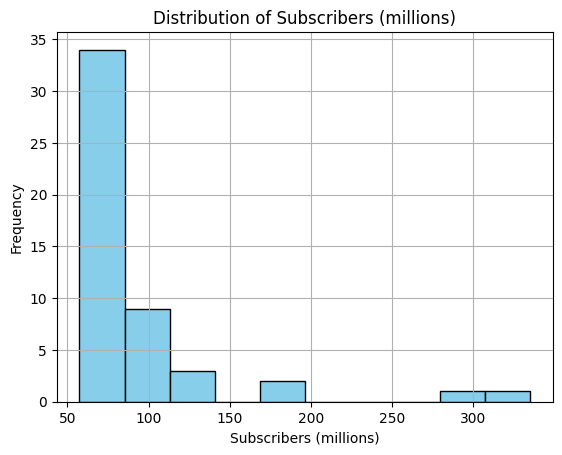

In [18]:
df['Subscribers (millions)'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Subscribers (millions)')
plt.xlabel('Subscribers (millions)')
plt.ylabel('Frequency')
plt.show()

#### Box Plot visualization

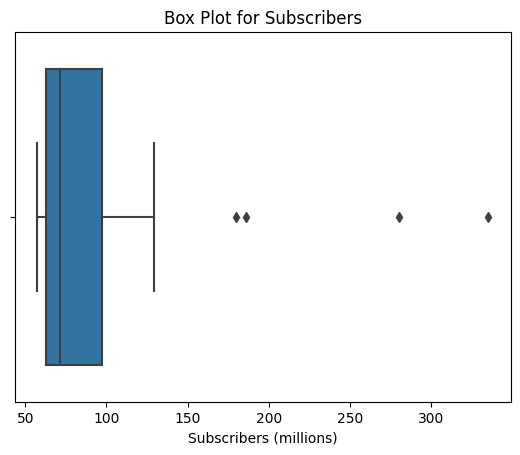

In [19]:
sns.boxplot(x=df['Subscribers (millions)'])
plt.title('Box Plot for Subscribers')
plt.show()

#### Scatter Plot Visualization

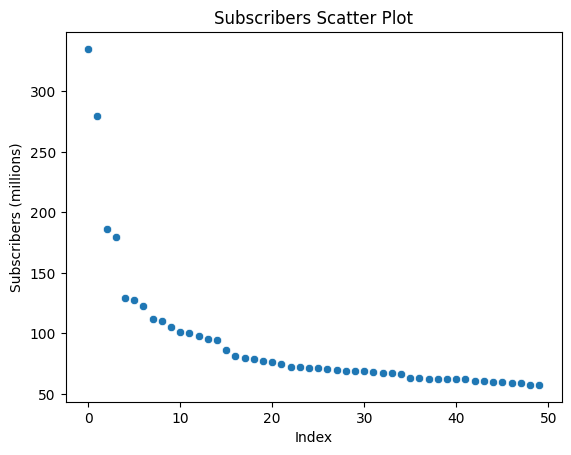

In [20]:
sns.scatterplot(x=df.index, y=df['Subscribers (millions)'])
plt.title('Subscribers Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Subscribers (millions)')
plt.show()

## Correlation Analysis

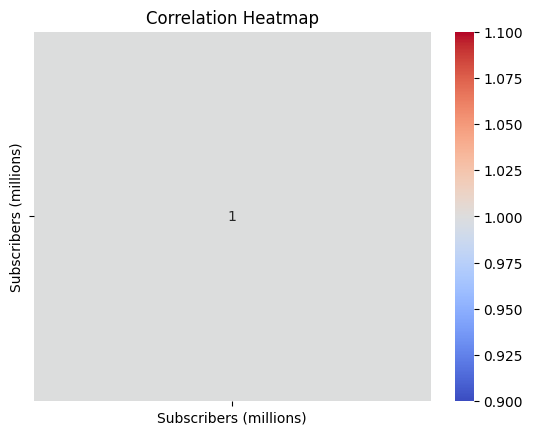

In [21]:
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Outlier Detection

In [22]:
Q1 = df['Subscribers (millions)'].quantile(0.25)
Q3 = df['Subscribers (millions)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Subscribers (millions)'] < Q1 - 1.5 * IQR) | (df['Subscribers (millions)'] > Q3 + 1.5 * IQR)]
print("Outliers:\n", outliers)

Outliers:
                          Name Brand channel  Subscribers (millions)  \
0                     MrBeast            No                   335.0   
1                    T-Series           Yes                   280.0   
2  Cocomelon - Nursery Rhymes           Yes                   186.0   
3                   SET India           Yes                   180.0   

  Primary language       Category        Country  
0          English  Entertainment  United States  
1            Hindi          Music          India  
2          English      Education  United States  
3            Hindi  Entertainment          India  


## Feature Distribution Analysis

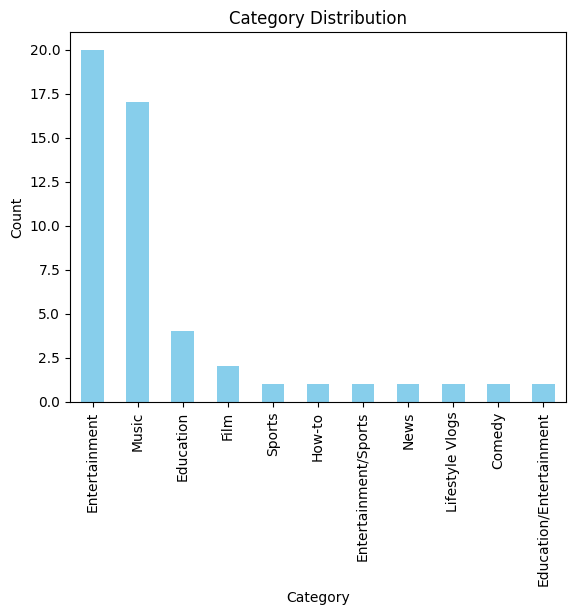

In [23]:
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Grouped Aggregations

#### Analyze Subscribers (millions) by Category.

Category
Comedy                       60.6
Education                   426.0
Education/Entertainment      60.2
Entertainment              2025.2
Entertainment/Sports         71.3
Film                        163.8
How-to                       81.1
Lifestyle Vlogs              62.2
Music                      1424.1
News                         68.6
Sports                      105.0
Name: Subscribers (millions), dtype: float64


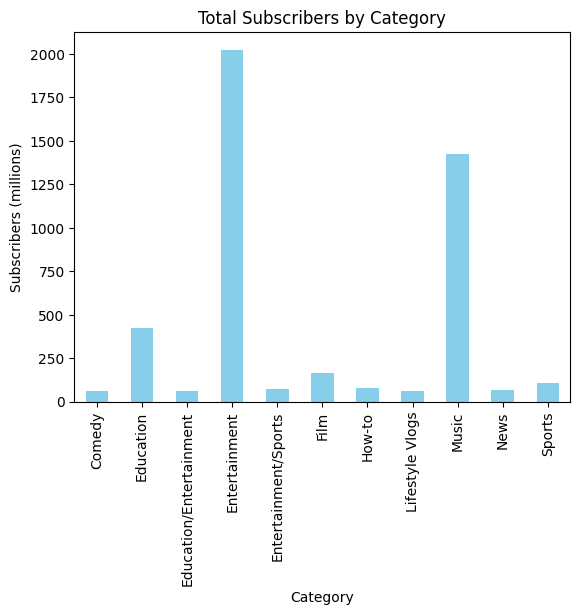

In [24]:
grouped = df.groupby('Category')['Subscribers (millions)'].sum()
print(grouped)
grouped.plot(kind='bar', color='skyblue')
plt.title('Total Subscribers by Category')
plt.ylabel('Subscribers (millions)')
plt.show()


## Insights from Relationships Between Features

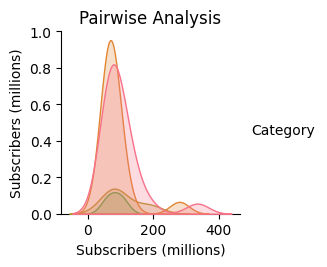

In [25]:
sns.pairplot(df, hue='Category')
plt.title('Pairwise Analysis')
plt.show()

## Additional Analyses

#### Top Channels by Subscribers

In [26]:
top_channels = df.nlargest(5, 'Subscribers (millions)')
print("Top Channels:\n", top_channels)


Top Channels:
                          Name Brand channel  Subscribers (millions)  \
0                     MrBeast            No                   335.0   
1                    T-Series           Yes                   280.0   
2  Cocomelon - Nursery Rhymes           Yes                   186.0   
3                   SET India           Yes                   180.0   
4               Vlad and Niki            No                   129.0   

  Primary language       Category        Country  
0          English  Entertainment  United States  
1            Hindi          Music          India  
2          English      Education  United States  
3            Hindi  Entertainment          India  
4          English  Entertainment         Russia  


#### Country-wise Distribution

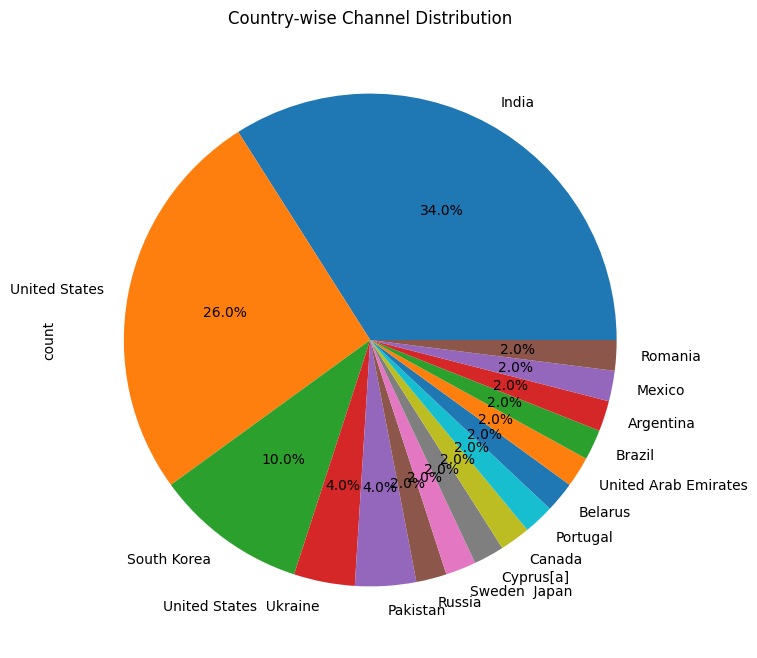

In [27]:
plt.figure(figsize=(10, 8)) 
df['Country'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Country-wise Channel Distribution')
plt.show()

# Data Preprocessing

### Handle Missing Values

In [28]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

### Encode Categorical Variables

In [29]:
df_encoded = pd.get_dummies(df, columns=['Brand channel', 'Primary language', 'Category', 'Country'], drop_first=True)

In [ ]:
df_encoded

,Name,Subscribers (millions),Brand channel_Yes,Primary language_Bhojpuri,Primary language_English,Primary language_Hindi,Primary language_Korean,Primary language_Malayalam,Primary language_Portuguese,"Primary language_Portuguese, English",...,Country_Mexico,Country_Pakistan,Country_Portugal,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden Japan,Country_United Arab Emirates,Country_United States,Country_United States Ukraine
0,MrBeast,335.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,T-Series,280.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Cocomelon - Nursery Rhymes,186.0,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,SET India,180.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Vlad and Niki,129.0,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,Kids Diana Show,128.0,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,Like Nastya,123.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,Zee Music,112.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,PewDiePie,110.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9,WWE,105.0,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Scale or Normalize Numerical Features

In [ ]:
scaler = StandardScaler()
df_encoded['Subscribers (millions)'] = scaler.fit_transform(df_encoded[['Subscribers (millions)']])

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Subscribers (millions)', axis=1)
y = df_encoded['Subscribers (millions)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model

In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

label_encoder = LabelEncoder()

df_encoded = df.copy()
df_encoded['Brand channel'] = label_encoder.fit_transform(df['Brand channel'])
df_encoded['Primary language'] = label_encoder.fit_transform(df['Primary language'])
df_encoded['Category'] = label_encoder.fit_transform(df['Category'])
df_encoded['Country'] = label_encoder.fit_transform(df['Country'])

X = df_encoded.drop(columns=['Subscribers (millions)', 'Name'])  # drop 'Name' since it's just an identifier
y = df_encoded['Subscribers (millions)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 34.666458748196234
Mean Squared Error: 2170.9107804745936
R-squared: -18.81045407567881
